In [1]:
#Kittipong Wangnok
#School of Physics, Institute of Science, Suranaree University of Technology
#Import module
import sys
import os
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
from matplotlib import pyplot as plt

from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif',size=14)

In [2]:
ls

TNO_ephemeris.ipynb
TNO_ephemeris_determination.dat
TNO_ephemeris_determination_linear.pdf
interporate_lnLTT_fit_TNO.out
oc_dpleo_Beuermann_Schwope_Kittipong.dat
oc_linear_dpleo_Beuermann_Schwope_Kittipong_ephemeris_determination.txt


In [3]:
#Read data ---#1
Input = "TNO_ephemeris_determination.dat"
Data   = np.genfromtxt(Input)

Epoch = Data[:,0]
T_obs = Data[:,1]
T_obs_err = Data[:,2]

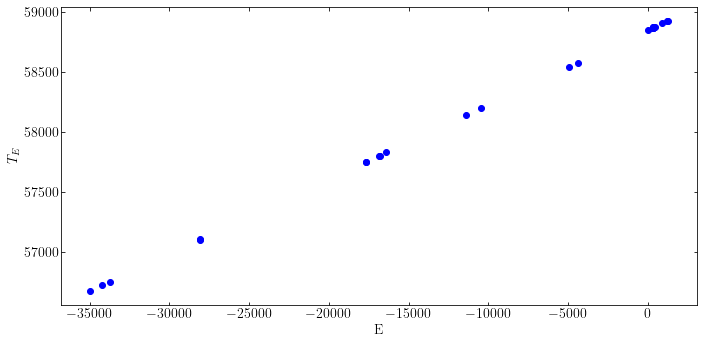

In [4]:
fig, (ax0) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
#plt.xlim(-0.04,0.04)
#plt.xlabel('Orbital phase')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(Epoch, T_obs, yerr= T_obs_err, fmt='o', color='blue',
             ecolor='lightgray', elinewidth=1, capsize=0)


#ax0.legend(loc="best")
ax0.set_xlabel('E')
ax0.set_ylabel('$T_{E}$')

#ax0.set_ylim(-30, 40)

fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("spot_longitude_Beuermann_Kittipong.png")
plt.show()

In [5]:
x = Epoch
y = T_obs
dy = T_obs_err

len_x = len(x)
print(len_x)

25


In [6]:
# Calling the scipy's curve_fit function from optimize module
from scipy.optimize import curve_fit
import scipy.optimize as optimization 

# Defining a fitting fucntion
def linear_fit(x,m,c):
    return m*x + c

params, covariance = optimization.curve_fit(f = linear_fit, xdata = x, ydata = y, sigma=dy, absolute_sigma=False)

m = params[0]
c = params[1]

dm = covariance[0,0]
dc = covariance[1,1]


print('Slope (m) is ', m)
print('The error of the slope (dm) is ', dm**0.5)
print('Intercept (c) is ', c)
print('The error of the intercept (dc) is ', dc**0.5)
#print(covariance)

Slope (m) is  0.062362855989866905
The error of the slope (dm) is  6.866834781974663e-10
Intercept (c) is  58851.3006302073
The error of the intercept (dc) is  1.3716706856015583e-05


In [7]:
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
print(len(x_line))
y_line = linear_fit(x_line, *params) #### For all interporation 
ys = linear_fit(x, *params)

print(len(y_line))
print(len(ys))

Residual = y - ys

#np.savetxt('TNO_ephemeris_determination_1.out', np.c_[x_line, y_line, y, dy], fmt="%.5f")

#Reduced_chisqrt
m = 2
dof = len_x - m
Chi_sqr = ((y - ys)**2/(dy)**2)/dof
Reduced_chisq_ln= sum(Chi_sqr)
print(Reduced_chisq_ln)

50
50
25
2.3897746750207345


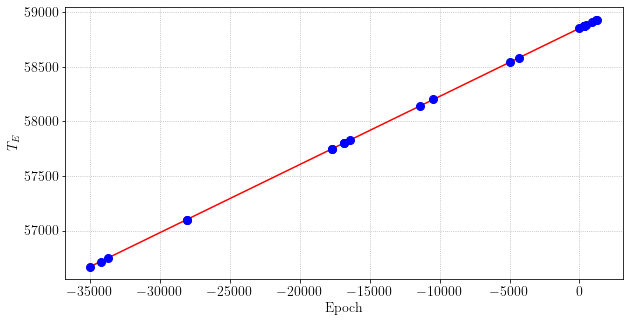

In [8]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
# create a line plot for the mapping function
plt.plot(x_line, y_line, '-', color='red')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('Epoch')
plt.ylabel('$T_{E}$')
plt.grid(linestyle='dotted')
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()

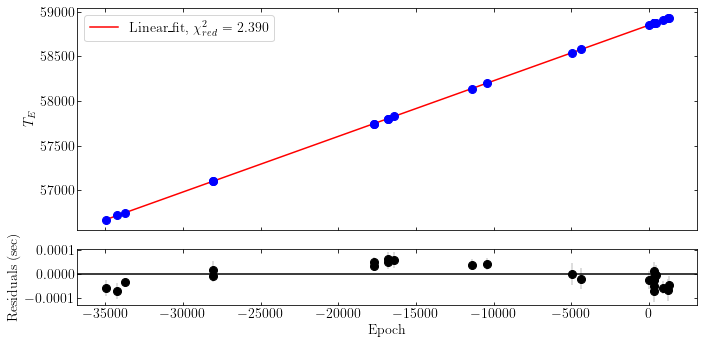

In [9]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x_line, y_line, '-', color='red',label='Linear\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_ln)))

ax0.legend(loc="best")
ax0.set_ylabel('$T_{E}$')
ax1.set_ylabel('Residuals (sec)')


ax1.errorbar(x, Residual, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
plt.savefig("TNO_ephemeris_determination_linear.pdf", dpi=1000)

plt.show()

In [10]:
#The ephemeris from Schwope et al. (2002)
T0_bjd = 48773.215071
T0_bjd_err = 0.000018
P0_day = 0.06236283691
P0_day_err = 0.00000000070

#T0_bjd = 58851.3006302073
#T0_bjd_err = 1.3716706856015583e-05
#P0_day = 0.062362855989866905
#P0_day_err = 6.866834781974663e-10

#T0_bjd = 48773.21461
#T0_bjd_err = 0.00009
#P0_day = 0.0623628426
#P0_day_err = 0.0000000006

In [11]:
#Please change the input file
DP_Leo_bjd = open("oc_dpleo_Beuermann_Schwope_Kittipong.dat",'r').readlines()
N_dpleo_bjd = len(DP_Leo_bjd)

#Read datat
Cycle = []
T_obs = []
T_obs_err = []
#Please change the input file
for line in open("oc_dpleo_Beuermann_Schwope_Kittipong.dat"):
#for line in open("T_mid_Beuermann_Schwope.in"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split(" ")[0]))
        T_obs.append(float(li.split(" ")[1]))
        T_obs_err.append(float(li.split(" ")[2]))

In [12]:
BJD_time_a = [i for i in range(N_dpleo_bjd)]
Delta_aT = [i for i in range(N_dpleo_bjd)]
Delta_aT_err = [i for i in range(N_dpleo_bjd)]
E_af = [i for i in range(N_dpleo_bjd)] #float number
E_ak = [i for i in range(N_dpleo_bjd)] #integer number
E_aj = [i for i in range(N_dpleo_bjd)] #integer number
P_aE = [i for i in range(N_dpleo_bjd)]
P_err_aE = [i for i in range(N_dpleo_bjd)]
T_aC_linear = [i for i in range(N_dpleo_bjd)]
T_aO_linear = [i for i in range(N_dpleo_bjd)]
P_aver_a = [i for i in range(N_dpleo_bjd)]
P_aver_std_a = [i for i in range(N_dpleo_bjd)]

In [13]:
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo_bjd):
    BJD_time = np.array(T_obs)
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 1
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    
rerults = OC_cal
f = open('oc_linear_dpleo_Beuermann_Schwope_Kittipong_ephemeris_determination.txt', 'w')
#for upper_result in upper_result:
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
0	44214.553250	-234703	44214.553250	44214.554056	-69.613855	13.856981
1	44214.615620	-234702	44214.615620	44214.616419	-68.994964	13.856962
2	44214.677980	-234701	44214.677980	44214.678781	-69.240073	13.856942
3	44968.023090	-222621	44968.023090	44968.021851	107.026918	98.737786
4	44968.957120	-222606	44968.957120	44968.957294	-15.017718	98.737753
5	44969.019620	-222605	44969.019620	44969.019657	-3.166827	98.737750
6	44978.997550	-222445	44978.997550	44978.997711	-13.872271	98.737389
7	44993.900780	-222206	44993.900780	44993.902429	-142.437327	58.176372
8	44993.963280	-222205	44993.963280	44993.964791	-130.586436	58.176368
9	44994.026420	-222204	44994.026420	44994.027154	-63.439545	58.176364
10	45020.905130	-221773	45020.905130	45020.905537	-35.161535	18.674786
11	45021.902920	-221757	45021.902920	45021.903342	-36.491280	18.674598
12	45024.833860	-221710	45024.833860	45024.834396	-46.283404	58.174490
13	45731.966400	-2

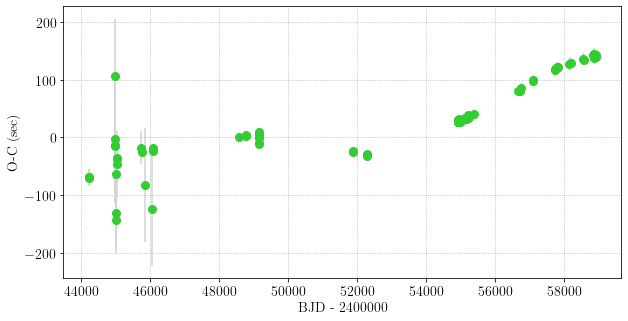

In [14]:
#Plot O-C vs BJD
InputFileInput  = 'oc_linear_dpleo_Beuermann_Schwope_Kittipong_ephemeris_determination.txt'
Data   = np.genfromtxt(InputFileInput)
Cycle = Data[:,0]
T_O = Data[:,1]
T_C = Data[:,2]
BJD_time = Data[:,3]
OC_s = Data[:,4]
OC_s_err = Data[:,5]

##Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', markersize=8, color='limegreen', ecolor='lightgray')
#plt.xlim(4850,5450)
#plt.ylim(-50,60)
plt.xlabel('BJD - 2400000')
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()

### Try to use sinusoidal fuction for the fitting

In [15]:
x = BJD_time
y = OC_s
dy = OC_s_err

len_x = len(x)
print(len_x)

#print(dy)

113


In [16]:
def sin_fit(x, dP, dt0, a, b, c):
    Epoch = (x-T0_bjd)/P0_day
    return dP*Epoch +dt0 + a*np.sin(b*x - np.radians(c))

In [17]:
#guess = [0,0,41.9455, 0.0000324289, -145.235]
guess = [0,0,30, 0.00003, 0]
#params, params_covariance = optimization.curve_fit(sin_fit, x, y, guess)
params, params_covariance = optimization.curve_fit(sin_fit, x, y,sigma=dy, absolute_sigma=False,p0=guess)
#params, params_covariance = optimization.curve_fit(sin_fit, x, y,sigma=dy, absolute_sigma=False)



dP = params[0]
dt0 = params[1]
a = params[2]
b = params[3]
c = params[4]


ddP = params_covariance[0,0]
ddt0 = params_covariance[1,1]
da = params_covariance[2,2]
db = params_covariance[3,3]
dc = params_covariance[4,4]

output_fit = sin_fit(x, *params)


print("The fitting parameters")
print("dP =", dP, "+/-", ddP**0.5)
print("dt0 =", dt0, "+/-", ddt0**0.5)
print("a =", a, "+/-", da**0.5)
print("b =", b, "+/-", db**0.5)
print("c =", c, "+/-", dc**0.5)


The fitting parameters
dP = 0.0007450594642219958 +/- 1.0822724351583964e-05
dt0 = -25.67004297119028 +/- 0.6610042769953592
a = 44.85980280492897 +/- 0.8182352877679878
b = 0.0005383521945275479 +/- 5.799120359437475e-06
c = 1722.759363580721 +/- 16.897842762019383


In [18]:
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
y_line = sin_fit(x_line, *params) #### For all interporation 

In [19]:
print(x_line,y_line)

[44214.554056   44514.89220584 44815.23035567 45115.56850551
 45415.90665535 45716.24480518 46016.58295502 46316.92110486
 46617.25925469 46917.59740453 47217.93555437 47518.2737042
 47818.61185404 48118.95000388 48419.28815371 48719.62630355
 49019.96445339 49320.30260322 49620.64075306 49920.9789029
 50221.31705273 50521.65520257 50821.99335241 51122.33150224
 51422.66965208 51723.00780192 52023.34595176 52323.68410159
 52624.02225143 52924.36040127 53224.6985511  53525.03670094
 53825.37485078 54125.71300061 54426.05115045 54726.38930029
 55026.72745012 55327.06559996 55627.4037498  55927.74189963
 56228.08004947 56528.41819931 56828.75634914 57129.09449898
 57429.43264882 57729.77079865 58030.10894849 58330.44709833
 58630.78524816 58931.123398  ] [-79.30936772 -68.51142273 -57.92304049 -47.72682804 -38.09516228
 -29.18569335 -21.13723213 -14.06612927  -8.06324003  -3.19155424
   0.51544685   3.05466395   4.45346062   4.76894941   4.08650208
   2.51752252   0.19654075  -2.72229651 

In [20]:
#Reduced_chisqrt
n = 5
dof = len_x - n
Chi_sqr = ((y - output_fit)**2/(dy)**2)/dof
Reduced_chisq = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq)

Reduced_chisq: 0.5433467228127424


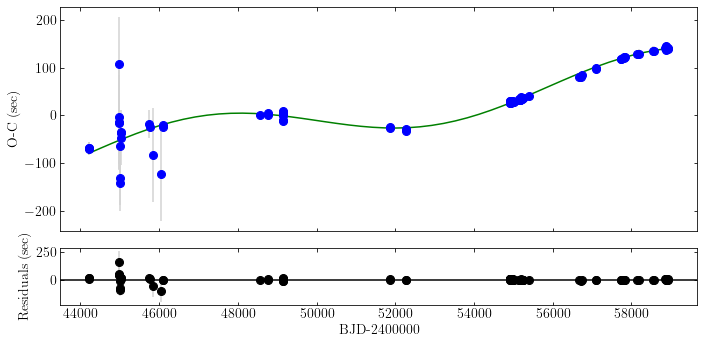

In [21]:
N_BMJD = 2400000
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('BJD-'+str(N_BMJD))

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x_line, y_line, '-', color='green')

#ax0.set_ylim(-40,60)

ax0.set_ylabel('O-C (sec)')
ax1.set_ylabel('Residuals (sec)')


Res_lnLTT_fit = y-output_fit
#np.savetxt("2022_May_week4_TNO_TNO_ephemeris_lnLTT_res.out", np.c_[x, (x-T)/Period, Res_lnLTT_fit, dy])


ax1.errorbar(x, Res_lnLTT_fit, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')

ax1.axhline(y=0, color='black', linestyle='-')

#plt.savefig("2022_Feb_week4_new_ephemeris_sin_fit_Res.jpg", dpi=1000)

plt.show()

In [22]:
N = 700
x_range = [i for i in range(N)]
x_range_a = [i for i in range(N)]
y_range = [i for i in range(len(x_range))]
step=1*100
#step

interporate = []
for i in range(300, N):
    x_range[i] = i*step
    Epoch = np.round((x_range[i] - T0_bjd)/P0_day)
    y_range[i] = sin_fit(x_range[i], *params)
#    print(x_range[i], y_range[i], Epoch)
    interporate.append('%0.0f %0.2f %0.10f %0.10f %0.0f %0.5f' %(i, x_range[i], T0_bjd, P0_day, Epoch, y_range[i]))
    
data_out = interporate
f = open("interporate_lnLTT_fit_TNO.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

InputFile_out = "interporate_lnLTT_fit_TNO.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_range_lnLTT_TNO = Data_out[:,1]
Epoch_range_lnLTT_TNO = Data_out[:,4]
y_range_lnLTT_TNO = Data_out[:,5]

#print(y_range)

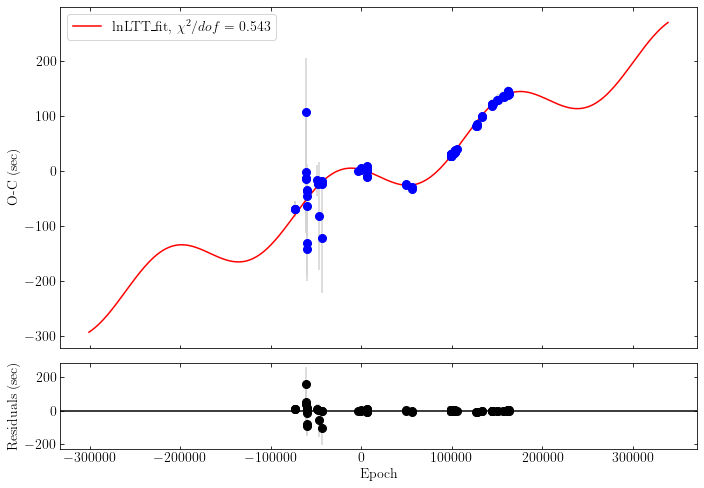

In [23]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 7), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar((x-T0_bjd)/P0_day, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(Epoch_range_lnLTT_TNO, y_range_lnLTT_TNO, '-', color='red',label='lnLTT\_fit, $\chi^{2}/dof$ = '+str('%0.3f' %(Reduced_chisq)))
ax0.legend(loc="best")
ax0.set_ylabel('O-C (sec)')
ax1.set_ylabel('Residuals (sec)')


ax1.errorbar((x-T0_bjd)/P0_day, Res_lnLTT_fit, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
#plt.savefig("2022_May_week4_TNO_TNO_ephemeris_lnLTT.pdf", dpi=1200)

plt.show()